In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("insurance.csv")

In [3]:
df.shape

(986, 11)

In [4]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [20]:
df['BMI']= np.round((df['Weight']/(df['Height']**2)*10000),2)

In [21]:
df['BMI'].min()

15.16

In [22]:
df['BMI'].max()

50.0

No nulls in the dataset

In [23]:
correlation_matrix=df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

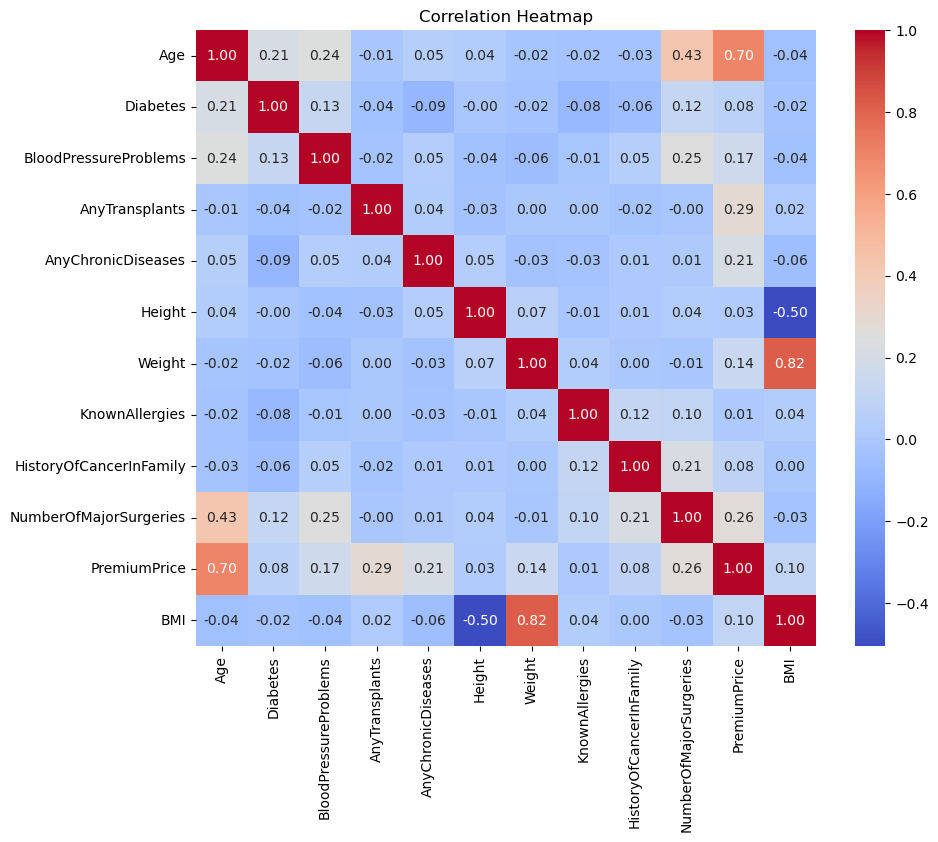

In [24]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation Heatmap')


<h1>Heatmap insights<h1>


<h3>We can see from above correlation heatmap that Premium Price is highly correlated to Age. 15-30% correlation observed with AnyTransplants, NumberofMajorSurgeries, Any Chronic disease, BPProblems and weight<h3>

<Axes: xlabel='Diabetes', ylabel='PremiumPrice'>

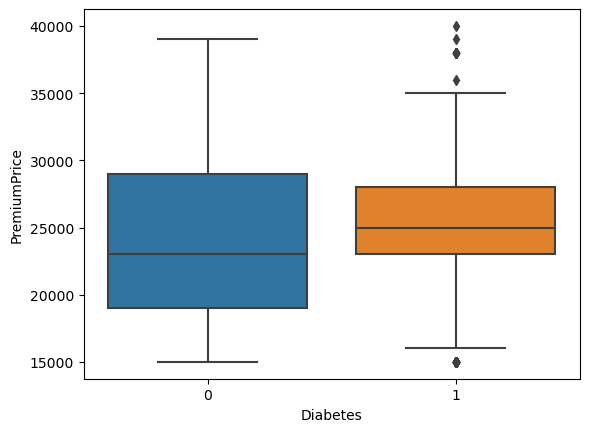

In [12]:
sns.boxplot(x= 'Diabetes', y='PremiumPrice', data= df)

<font size="5"> Median premium is higher for people with Diabetes

<Axes: xlabel='AnyTransplants', ylabel='PremiumPrice'>

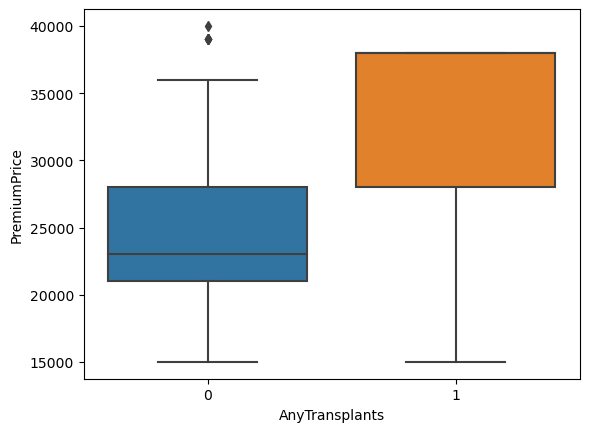

In [15]:
sns.boxplot(x= 'AnyTransplants', y='PremiumPrice', data= df)

<font size="5">Median premium is higher for people with Transplants

In [14]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

<Axes: xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

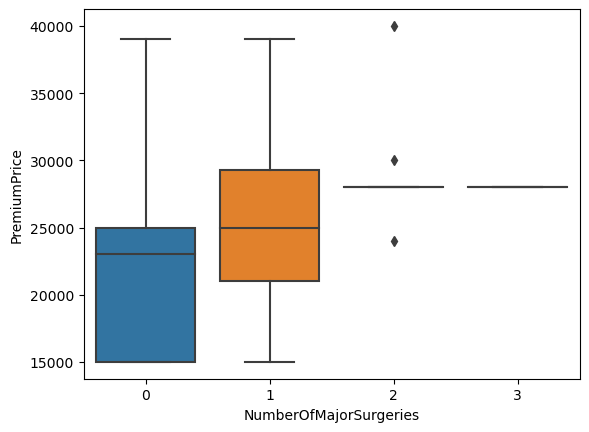

In [25]:
sns.boxplot(x= 'NumberOfMajorSurgeries', y='PremiumPrice', data= df)

<font size="5"> As the number of major surgeries increases the PremiumPrice increases

In [26]:
df.NumberOfMajorSurgeries.value_counts()

NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64

<Axes: xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

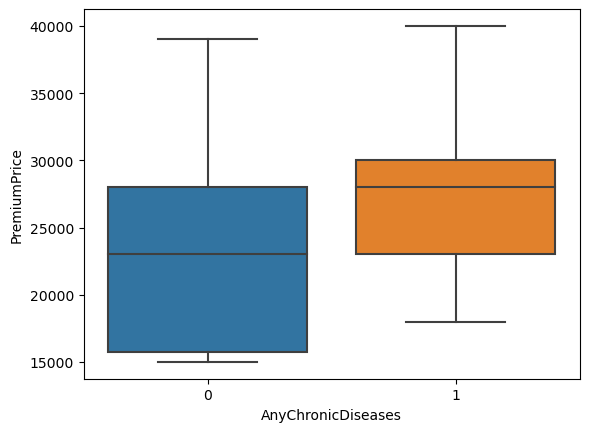

In [27]:
sns.boxplot(x= 'AnyChronicDiseases', y='PremiumPrice', data= df)

<Axes: xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

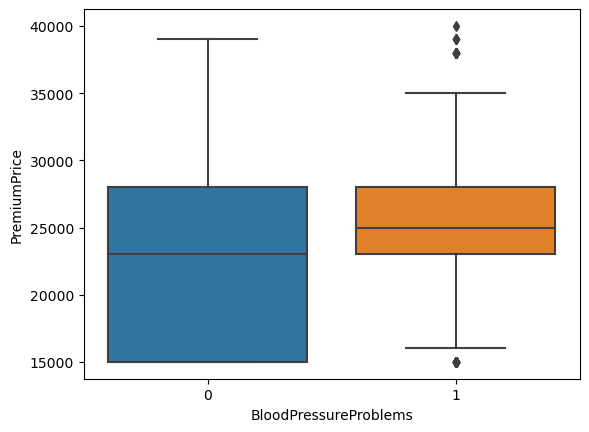

In [28]:
sns.boxplot(x= 'BloodPressureProblems', y='PremiumPrice', data= df)

<font size="5"> BP Problems result in high premium prices

<Axes: xlabel='KnownAllergies', ylabel='PremiumPrice'>

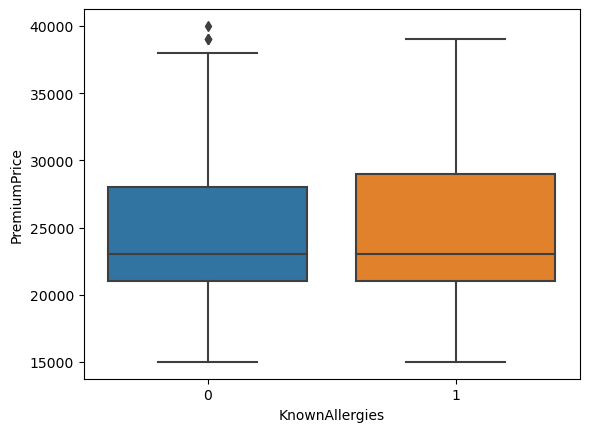

In [29]:
sns.boxplot(x= 'KnownAllergies', y='PremiumPrice', data= df)

<font size="5"> KnownAllergies doesn't have much impact on the premium

<h1> Outliers Identification using IQR method

In [40]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [41]:
outliers_age = find_outliers_iqr(df, 'Age')
print("Outliers in 'age' using IQR method:")
print(outliers_age)

Outliers in 'age' using IQR method:
Empty DataFrame
Columns: [Age, Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, Height, Weight, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries, PremiumPrice, BMI]
Index: []


In [54]:
outliers_height = find_outliers_iqr(df, 'Height')
print("Outliers in 'height' using IQR method:")
print(outliers_height)

Outliers in 'height' using IQR method:
Empty DataFrame
Columns: [Age, Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, Height, Weight, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries, PremiumPrice, BMI]
Index: []


In [55]:
outliers_weight = find_outliers_iqr(df, 'Weight')
print("Outliers in 'weight' using IQR method:")
print(outliers_weight)

Outliers in 'weight' using IQR method:
     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
154   21         0                      0               0                   0   
158   43         0                      0               0                   0   
183   36         0                      0               0                   0   
186   19         0                      0               0                   0   
192   50         1                      0               0                   0   
195   19         0                      0               0                   0   
196   39         0                      1               0                   0   
203   24         0                      1               0                   0   
204   27         0                      1               0                   0   
207   18         0                      0               0                   0   
217   65         0                      1               0             

In [51]:
key_variables = ['Height', 'Weight', 'PremiumPrice']


In [52]:
for column in key_variables:
    outliers = find_outliers_iqr(df, column)
    print(f"Outliers in '{column}':")
    print(outliers)

Outliers in 'Height':
Empty DataFrame
Columns: [Age, Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, Height, Weight, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries, PremiumPrice, BMI]
Index: []
Outliers in 'Weight':
     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
154   21         0                      0               0                   0   
158   43         0                      0               0                   0   
183   36         0                      0               0                   0   
186   19         0                      0               0                   0   
192   50         1                      0               0                   0   
195   19         0                      0               0                   0   
196   39         0                      1               0                   0   
203   24         0                      1               0                   0   
204   27         

In [50]:
df['PremiumPrice'].value_counts().sort_values()

PremiumPrice
17000      1
20000      1
40000      1
22000      1
27000      1
36000      2
34000      2
18000      2
16000      3
32000      4
24000      4
39000      5
26000      7
19000     15
21000     26
31000     31
38000     34
35000     41
30000     47
29000     72
25000    103
28000    132
15000    202
23000    249
Name: count, dtype: int64

In [56]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI'],
      dtype='object')

<Axes: xlabel='PremiumPrice', ylabel='count'>

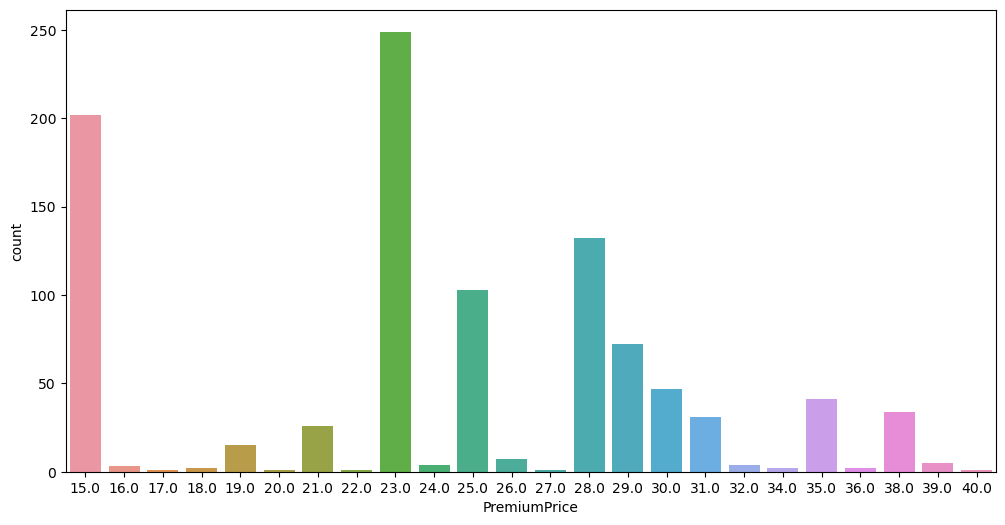

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['PremiumPrice']/1000)

<Axes: xlabel='Weight', ylabel='count'>

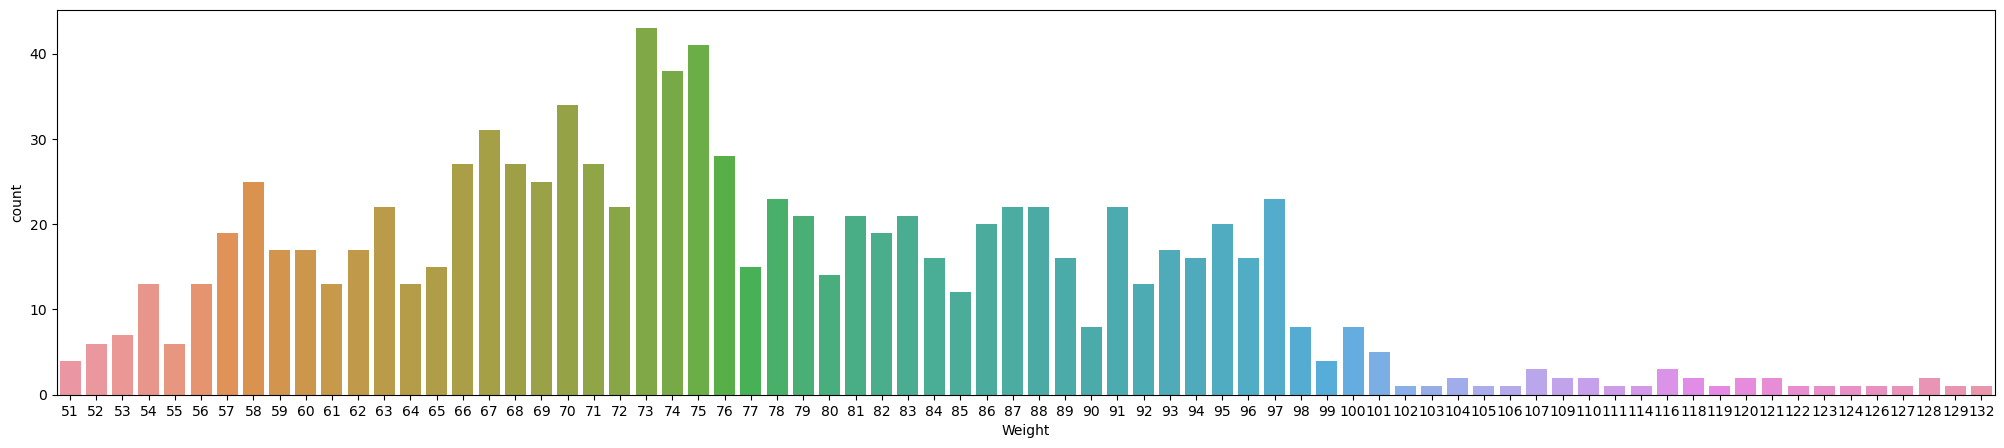

In [72]:
plt.figure(figsize=(25, 5))
sns.countplot(x=df['Weight'])

<Axes: xlabel='Height', ylabel='count'>

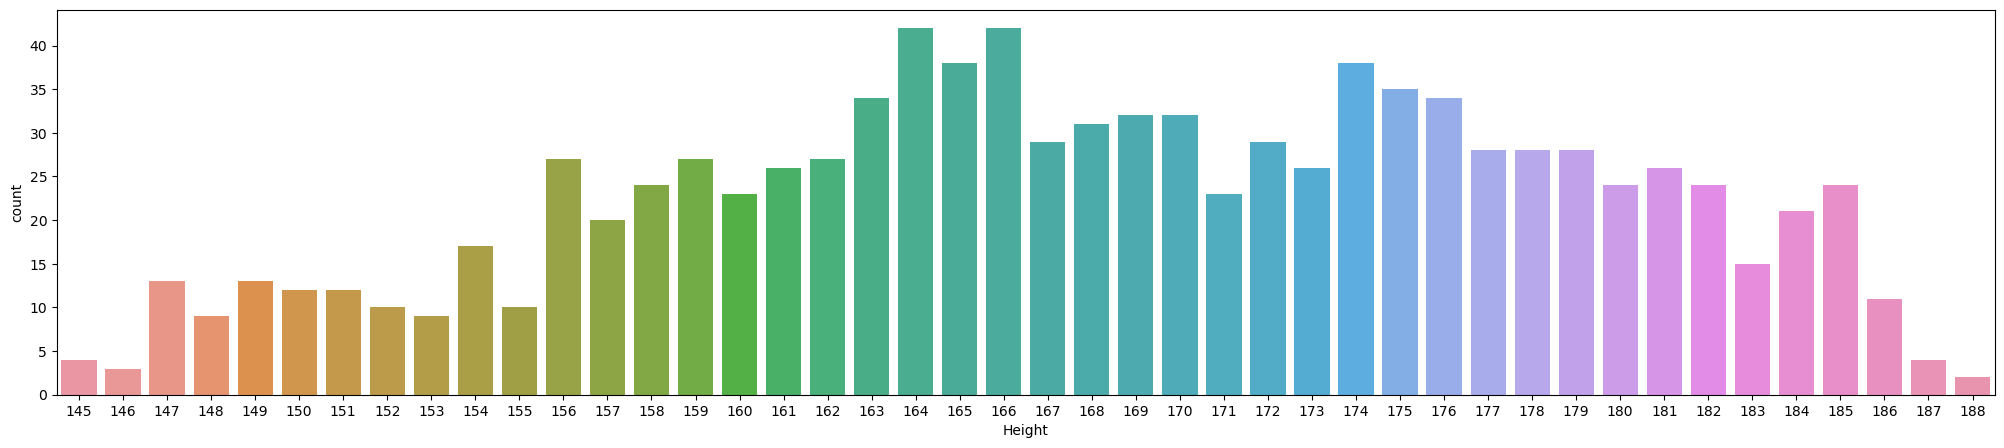

In [73]:
plt.figure(figsize=(25, 5))
sns.countplot(x=df['Height'])

<h1> Significance test

Null hypothesis - There is no significant difference in premium with or without the given condition
Alternate hypothesis - There is significant difference in premium with or without the given condition

In [75]:
group_with_diabetes= df[df['Diabetes']==1]['PremiumPrice']
group_without_diabetes= df[df['Diabetes']==0]['PremiumPrice']

In [76]:
import pandas as pd
from scipy import stats

In [77]:
stats.ttest_ind(group_with_diabetes, group_without_diabetes)

TtestResult(statistic=2.3975629574233563, pvalue=0.016690091385306107, df=984.0)

<font size="4"> We can see that pvalue is <0.05. Hence, The group with and without diabetes have significant differences in premium prices. We reject null hypothesis

In [78]:
group_with_bp= df[df['BloodPressureProblems']==1]['PremiumPrice']
group_without_bp= df[df['BloodPressureProblems']==0]['PremiumPrice']

In [79]:
stats.ttest_ind(group_with_bp, group_without_bp)

TtestResult(statistic=5.316365561489142, pvalue=1.3100497090721932e-07, df=984.0)

<font size="4"> Since pvalue< 0.05 hence, the group with and without BloodPressure Problems have significant differences in premium. We reject null hypothesis

In [80]:
group_with_trans= df[df['AnyTransplants']==1]['PremiumPrice']
group_without_trans= df[df['AnyTransplants']==0]['PremiumPrice']

In [81]:
stats.ttest_ind(group_with_trans, group_without_trans)

TtestResult(statistic=9.471654448151899, pvalue=1.9787295423632775e-20, df=984.0)

<font size="4"> Since pvalue< 0.05 hence, the group with and without Any Transplants have significant differences in premium. We reject null hypothesis

In [82]:
group_with_disease= df[df['AnyChronicDiseases']==1]['PremiumPrice']
group_without_disease= df[df['AnyChronicDiseases']==0]['PremiumPrice']

In [83]:
stats.ttest_ind(group_with_disease, group_without_disease)

TtestResult(statistic=6.69104572734849, pvalue=3.713413765291482e-11, df=984.0)

<font size="4"> Since pvalue< 0.05 hence, the group with and without Any Chronic Disease have significant differences in premium. We reject null hypothesis

In [84]:
group_with_allergies= df[df['KnownAllergies']==1]['PremiumPrice']
group_without_allergies= df[df['KnownAllergies']==0]['PremiumPrice']

In [85]:
stats.ttest_ind(group_with_allergies, group_without_allergies)

TtestResult(statistic=0.3796775160044091, pvalue=0.7042667378180334, df=984.0)

<font size='4'> Since pvalue>0.05 hence, the group with or without allergies do not have significant differences in premium. We fail to reject the null hypothesis

In [86]:
group_with_cancer= df[df['HistoryOfCancerInFamily']==1]['PremiumPrice']
group_without_cancer= df[df['HistoryOfCancerInFamily']==0]['PremiumPrice']

In [87]:
stats.ttest_ind(group_with_cancer, group_without_cancer)

TtestResult(statistic=2.617041984412821, pvalue=0.009005587310447026, df=984.0)

<font size="4"> Since pvalue< 0.05 hence, the group with and without Cancer history in the family have significant differences in premium. We reject null hypothesis

In [88]:
grouped_data = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in df['NumberOfMajorSurgeries'].unique()]
stats.f_oneway(*grouped_data)

F_onewayResult(statistic=26.13539359740762, pvalue=2.8711631377228097e-16)

<font size='4'> Since pvalue< 0.05 hence, the group with and without Number of Major Surgeries have significant differences in premium. We reject null hypothesis

In [100]:
group_with_surgeries= df[df['NumberOfMajorSurgeries']==1]['PremiumPrice']
group_without_surgeries= df[df['NumberOfMajorSurgeries']==0]['PremiumPrice']

In [101]:
stats.ttest_ind(group_with_surgeries, group_without_surgeries)

TtestResult(statistic=-5.497418991994781, pvalue=6.216602281341462e-08, df=489.0)

In [102]:
contingency_table = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'])

In [103]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=15.571225392078397, pvalue=7.945461025980538e-05, dof=1, expected_freq=array([[303.98377282, 268.01622718],
       [220.01622718, 193.98377282]]))

<font size = '4'> Since p values< 0.05, there is a statistically significant association between Diabetes and BloodPressureProblems

In [105]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI'],
      dtype='object')

In [106]:
contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

In [107]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.02062393388215223, pvalue=0.8858081638149811, dof=1, expected_freq=array([[712.94117647,  95.05882353],
       [157.05882353,  20.94117647]]))

<font size= '4'> There is no statisctically significant association between Any Chronic Disease and History of Cancer in Family 

In [109]:
contingency_table = pd.crosstab(df['AnyTransplants'], df['NumberOfMajorSurgeries'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.7205169893162533, pvalue=0.8683678631155989, dof=3, expected_freq=array([[452.28093306, 351.2494929 , 112.36206897,  15.10750507],
       [ 26.71906694,  20.7505071 ,   6.63793103,   0.89249493]]))

<font size= '4'> There is no statistically significant association between Any Transplants and Number of major surgeries

In [110]:
#BloodPressureProblems
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['NumberOfMajorSurgeries'])
chi2_contingency(contingency_table)


Chi2ContingencyResult(statistic=86.12341484802883, pvalue=1.4893488650667128e-18, dof=3, expected_freq=array([[254.55983773, 197.69574037,  63.24137931,   8.5030426 ],
       [224.44016227, 174.30425963,  55.75862069,   7.4969574 ]]))

<font size= '4'> There is statistically significant association between Blood Pressure Problems and Number of major surgeries

In [111]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['AnyTransplants'])
chi2_contingency(contingency_table)


Chi2ContingencyResult(statistic=0.39874887344149174, pvalue=0.5277360989921708, dof=1, expected_freq=array([[494.77079108,  29.22920892],
       [436.22920892,  25.77079108]]))

No statistically significant association between Blood Pressure Problems and Any Transplants

In [112]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['AnyChronicDiseases'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=1.8046980449571972, pvalue=0.17914556026705178, dof=1, expected_freq=array([[429.40365112,  94.59634888],
       [378.59634888,  83.40365112]]))

No statistically significant association between Blood Pressure Problems and Any Chronic Diseases

In [113]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['HistoryOfCancerInFamily'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=2.0041718300783176, pvalue=0.1568669440083543, dof=1, expected_freq=array([[462.35294118,  61.64705882],
       [407.64705882,  54.35294118]]))

No statistically significant association between Blood Pressure Problems and History of cancer in family

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  BMI                      986 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 92.6 KB


In [115]:
contingency_table = pd.crosstab(df['AnyTransplants'], df['AnyChronicDiseases'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.8603776272400288, pvalue=0.35363303686928205, dof=1, expected_freq=array([[762.92900609, 168.07099391],
       [ 45.07099391,   9.92900609]]))

<h1> Linear regression application to test hypotheses about the impact of various predictors on premium prices

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
X = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
        'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']

In [118]:
model= LinearRegression()

In [119]:
model.fit(X,y)

LinearRegression()

In [120]:
y_pred= model.predict(X)

In [121]:
model.coef_

array([ 3.29367129e+02, -4.29119839e+02,  1.80503577e+02,  7.89420126e+03,
        2.65488642e+03, -5.82187848e+00,  6.96753277e+01,  3.00882400e+02,
        2.31182937e+03, -6.54186239e+02])

In [122]:
model.intercept_

5480.609844772527

In [123]:
print(f"Mean squared error: {mean_squared_error(y, y_pred)}")
print(f"Coefficient of determination (R^2): {r2_score(y, y_pred)}")

Mean squared error: 13926506.103989717
Coefficient of determination (R^2): 0.6429120588329549
